In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [0]:
data=pd.read_csv('/content/drive/My Drive/sales_train_validation.csv')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [0]:
data.shape[1]

1919

In [0]:
data=data.drop(['item_id','dept_id','cat_id','state_id','store_id'],axis=1)

In [0]:
id=data['id']
data=data.drop(['id'],axis=1)
data=data.astype('float')

In [0]:
data.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,0.680781,0.665038,0.738898,0.980912,0.941522,0.696622,0.750148,0.723057,0.769925,0.773106,1.023352,1.143850,0.805576,0.746212,0.739915,...,1.200590,1.148213,1.300492,1.514628,1.568547,1.225320,1.163496,1.140899,1.115218,1.495933,1.766579,1.520499,1.182060,1.110430,1.061299,1.137455,1.493473,1.727517,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,2.727852,2.637849,2.842334,3.714944,3.688771,2.708641,2.922533,2.888537,3.085799,3.136922,3.944627,4.617819,3.076988,3.011551,3.023168,...,3.138745,3.085343,3.368736,3.958988,4.116284,2.994501,2.986132,2.909689,2.934280,3.999311,4.875745,4.539663,2.932883,2.969828,2.795303,2.982687,3.696225,4.371541,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1913 entries, d_1 to d_1913
dtypes: float64(1913)
memory usage: 445.0 MB


In [0]:

def clean(data,k):
  values=[]
  columns=data.columns
  for i in columns:
    values.append(data[i][k])
  return values


In [0]:
values=clean(data,k=30000)

In [0]:
print(len(values))

1913


In [0]:
x1=np.array(values)
#separation of training and testing set
a=int(0.8*len(x1))
x1_train=x1[:a]
x1_test=x1[a:]


In [0]:
print(len(x1_train))

1530


In [0]:
#preparation of training data
x_train=[]
y_train=[]
for i in range(28,len(x1_train)-28):
  x_train.append(x1_train[i-28:i])
  y_train.append((x1_train[i:i+28]))

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)



In [0]:
print(x_train.shape,y_train.shape)

(1474, 28) (1474, 28)


In [0]:
print(x_train)

[[2. 1. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 4. 0. 3.]
 [0. 0. 0. ... 0. 3. 0.]]


In [0]:
def normalize(data):
  sum1,sum2=0,0
  a=np.mean(data,axis=0)
  for i in range(len(a)):
    sum1=sum1+a[i]

  final_mean=sum1/data.shape[1]
  b=np.std(data,axis=0)
  for i in range(len(b)):
    sum2=sum2+b[i]
  final_std=sum2/data.shape[1]
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      data[i,j] -= final_mean
      data[i,j] /= final_std
  return data,final_mean,final_std 

 

In [0]:
normalize(x_train)
print(x_train.shape)

(1474, 28)


In [0]:
normalize(y_train)

(array([[-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977],
        [-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977],
        [-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977],
        ...,
        [-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977],
        [-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977],
        [-0.14933977, -0.14933977, -0.14933977, ..., -0.14933977,
         -0.14933977, -0.14933977]]),
 0.058344640434192685,
 0.39068388089540323)

In [0]:
x_train=x_train.reshape(1474,28,1)



In [0]:
print(y_train.shape,x_train.shape)

(1474, 28) (1474, 28, 1)


In [0]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.GRU(120,activation='relu',dropout=0.3,input_shape=(28,1)))





#model.add(layers.LSTM(96,activation='relu',return_sequences=True))
#model.add(layers.LSTM(56,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(28))
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Train on 1179 samples, validate on 295 samples
Epoch 1/50
1179/1179 [==============================] - 2s 2ms/step - loss: 0.9846 - accuracy: 0.0373 - val_loss: 1.0680 - val_accuracy: 0.0610
Epoch 2/50
1179/1179 [==============================] - 1s 1ms/step - loss: 0.9735 - accuracy: 0.0365 - val_loss: 1.0724 - val_accuracy: 0.0373
Epoch 3/50
1179/1179 [==============================] - 2s 1ms/step - loss: 0.9661 - accuracy: 0.0297 - val_loss: 1.0728 - val_accuracy: 0.0508
Epoch 4/50
1179/1179 [==============================] - 2s 1ms/step - loss: 0.9643 - accuracy: 0.0441 - val_loss: 1.0741 - val_accuracy: 0.0203
Epoch 5/50
1179/1179 [==============================] - 2s 1ms/step - loss: 0.9631 - accuracy: 0.0424 - val_loss: 1.0706 - val_accuracy: 0.0339
Epoch 6/50
1179/1179 [==============================] - 2s 1ms/step - loss: 0.9610 - accuracy: 0.0475 - val_loss: 1.0809 - val_accuracy: 0.0305
Epoch 7/50
1179/1179 [==============================] - 2s 1ms/step - loss: 0.9587 - accu

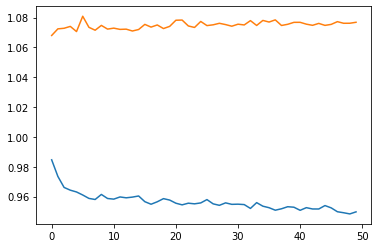

In [0]:
a=history.history['loss']
b=history.history['val_loss']
epochs=range(50)
plt.plot(epochs,a,label='training_loss')
plt.plot(epochs,b,label='validation_loss')
plt.show()

In [0]:
x_test=[]
y_test=[]
for i in range(28,len(x1_test)-28):
  x_test.append(x1_test[i-28:i])
  y_test.append((x1_test[i:i+28]))

In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)



In [0]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [0]:
normalize(x_test)

(array([[-0.47828558, -0.47828558, -0.47828558, ..., -0.47828558,
         -0.47828558, -0.47828558],
        [-0.47828558, -0.47828558, -0.47828558, ..., -0.47828558,
         -0.47828558, -0.47828558],
        [-0.47828558, -0.47828558, -0.47828558, ..., -0.47828558,
         -0.47828558, -0.47828558],
        ...,
        [-0.47828558, -0.47828558,  0.40550509, ..., -0.47828558,
         -0.47828558, -0.47828558],
        [-0.47828558,  0.40550509, -0.47828558, ..., -0.47828558,
         -0.47828558, -0.47828558],
        [ 0.40550509, -0.47828558, -0.47828558, ..., -0.47828558,
         -0.47828558, -0.47828558]]), 0.5411751856705985, 1.1314896454327978)

In [0]:
normalize(y_test)

(array([[-0.51145605, -0.51145605, -0.51145605, ..., -0.51145605,
         -0.51145605, -0.51145605],
        [-0.51145605, -0.51145605, -0.51145605, ..., -0.51145605,
         -0.51145605, -0.51145605],
        [-0.51145605, -0.51145605, -0.51145605, ..., -0.51145605,
         -0.51145605, -0.51145605],
        ...,
        [-0.51145605, -0.51145605,  0.35063739, ..., -0.51145605,
         -0.51145605, -0.51145605],
        [-0.51145605,  0.35063739, -0.51145605, ..., -0.51145605,
         -0.51145605, -0.51145605],
        [ 0.35063739, -0.51145605, -0.51145605, ..., -0.51145605,
         -0.51145605, -0.51145605]]), 0.5932721712538225, 1.15996707105347)

In [0]:
print(x_test.shape,y_test.shape)

(327, 28) (327, 28)


In [0]:
x_test=x_test.reshape(327,28,1)



In [0]:
y_predict=model.predict(x_test)

In [0]:
print(y_predict.shape)

(327, 28)


In [0]:
def evaluate(y_test,y_predict):
  rmse_scores=[]
  std_scores=[]
  for i in range(y_predict.shape[0]):
    rmse_scores.append(mean_squared_error(y_test[i],y_predict[i]))
    std_scores.append(np.std(y_test[i]))
  result=pd.DataFrame({'rmse':rmse_scores,'std':std_scores})  
  return result






In [0]:
frame=evaluate(y_test,y_predict)
frame.tail()

,rmse,std
322,1.684618,1.281956
323,1.674498,1.281956
324,1.665735,1.281956
325,1.661390,1.281956
326,1.694648,1.289371


In [0]:
def original(data,mean,std):
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):

      data[i,j] *= std
      data[i,j] += mean
  return data    

In [0]:
original(y_predict, mean=0.8180428134556574, std=1.293279444454908)

array([[0.79501957, 0.98113775, 0.69579446, ..., 0.6243945 , 0.98347676,
        0.7327995 ],
       [0.7371254 , 1.0868018 , 0.8909674 , ..., 1.2420821 , 0.9245395 ,
        0.95639664],
       [0.78143454, 0.5825894 , 0.9325006 , ..., 0.5760711 , 0.8187754 ,
        0.58469224],
       ...,
       [0.46844453, 0.65838945, 0.38484257, ..., 0.38257414, 0.57832986,
        0.86314446],
       [0.97762024, 0.59944516, 1.0243582 , ..., 0.3968366 , 1.2640887 ,
        0.50494194],
       [0.32555583, 0.575439  , 0.44150484, ..., 0.46307653, 0.63904744,
        0.8508591 ]], dtype=float32)

In [0]:
original(y_test, mean=0.8180428134556574, std=1.293279444454908)

array([[1.11022302e-16, 1.11022302e-16, 1.11022302e-16, ...,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [1.11022302e-16, 1.11022302e-16, 1.11022302e-16, ...,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [1.11022302e-16, 1.11022302e-16, 1.00000000e+00, ...,
        1.11022302e-16, 1.11022302e-16, 2.00000000e+00],
       ...,
       [1.11022302e-16, 1.00000000e+00, 1.11022302e-16, ...,
        1.00000000e+00, 1.11022302e-16, 1.11022302e-16],
       [1.00000000e+00, 1.11022302e-16, 1.11022302e-16, ...,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [1.11022302e-16, 1.11022302e-16, 1.11022302e-16, ...,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16]])

In [0]:
evaluate(y_test,y_predict)

,rmse,std
0,1.439540,1.140623
1,1.554304,1.140623
2,1.487040,1.160577
3,1.513168,1.153411
4,1.510223,1.145087
...,...,...
322,3.141427,1.657928
323,3.064179,1.657928
324,3.267868,1.657928
325,3.196569,1.657928


In [0]:
#function for final evaluation
  
  final=[]
  f=np.random.randint(0,30400,500)
  for k in f:
    values=clean(data,k)
    x1=np.array(values)
    #separation of training and testing set
    a=len(x1)-28
    x1_train=x1[:a]
    x_test=x1[a:]
    #preparation of training data
    x_train=[]
    y_train=[]
    for i in range(28,len(x1_train)-28):
      x_train.append(x1_train[i-28:i])
      y_train.append((x1_train[i:i+28]))
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    normalize(x_train)
    normalize(y_train)
    x_train=x_train.reshape(x_train.shape[0],28,1)
# fitting the model    
    model.fit(x_train,y_train,epochs=100)
   
 
    

Epoch 1/100
1829/1829 [==============================] - 2s 904us/step - loss: 56.4684 - accuracy: 0.0290
Epoch 2/100
1829/1829 [==============================] - 2s 940us/step - loss: 85.7895 - accuracy: 0.0317
Epoch 3/100
1829/1829 [==============================] - 2s 961us/step - loss: 52.3288 - accuracy: 0.0312
Epoch 4/100
1829/1829 [==============================] - 2s 953us/step - loss: 58.6485 - accuracy: 0.0312
Epoch 5/100
1829/1829 [==============================] - 2s 954us/step - loss: 4.1062 - accuracy: 0.0301
Epoch 6/100
1829/1829 [==============================] - 2s 941us/step - loss: 3.1083 - accuracy: 0.0328
Epoch 7/100
1829/1829 [==============================] - 2s 964us/step - loss: 1.1864 - accuracy: 0.0252
Epoch 8/100
1829/1829 [==============================] - 2s 933us/step - loss: 0.8445 - accuracy: 0.0355
Epoch 9/100
1829/1829 [==============================] - 2s 927us/step - loss: 0.7699 - accuracy: 0.0328
Epoch 10/100
1829/1829 [===========================

KeyboardInterrupt: ignored

In [0]:

final=[]
for k in range(data.shape[0]):
  values=clean(data,k)
  x1=np.array(values)
  #separation of training and testing set
  a=len(x1)-28
  x_test=x1[a:]
  mean1=np.mean(x_test)
  std1=np.std(x_test)
  for i in range(len(x_test)):
    x_test[i] -= mean1
    x_test[i] /= std1
  x_test=x_test.reshape(1,28,1)
  y_predict=model.predict(x_test)
  for i in range(len(y_predict)):
    y_predict[i] *= std1
    y_predict[i] += mean1
  final.append(y_predict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [0]:
final=np.array(final)
print(final.shape)

(30490, 1, 28)


In [0]:
final[30489]

array([[ 1.0566456 ,  1.2552927 ,  0.3882087 ,  1.2651856 ,  1.2173533 ,
         0.88859403,  1.568351  ,  1.3480918 ,  1.0685129 ,  1.13946   ,
         1.0591873 ,  1.5017407 ,  1.1075221 ,  0.98991793,  1.6902051 ,
        -0.1381923 ,  2.428154  ,  0.6978638 ,  0.6595571 ,  1.226933  ,
         0.5929218 ,  1.430661  ,  3.2963924 , -0.55612457,  2.5360913 ,
         1.2564129 ,  0.13201642,  4.618361  ]], dtype=float32)

# **XGBRegressor**

In [0]:
target_train=y_train[:,0]
print(target_train.shape)

(1474,)


In [0]:
target_test=y_test[:,0]
print(target_test.shape)


(327,)


In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
m1=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
m1.fit(x_train,target_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.model_selection import GridSearchCV
params={'objective':['reg:linear'],'colsample_bytree':[0.003,0.03,0.3],'learning_rate':[0.01,0.1,1,10],'max_depth':[5,10,20],'alpha':[0.01,0.1,1,10], 'n_estimators':[10,20]}
m2=xgb.XGBRegressor()
obj=GridSearchCV(estimator=m2,param_grid=params)
obj.fit(x_train,target_train)


[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, r...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'colsample_bytree': [0.003, 0.03, 0.3],
                   

In [0]:
print(obj.best_estimator_.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 20, 'min_child_weight': 1, 'missing': None, 'n_estimators': 20, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1, 'alpha': 0.01}


In [0]:
predicted=m1.predict(x_test)

In [0]:
print(x_test.shape,predicted.shape)

(327, 28) (327,)


In [0]:
print(type(predicted))

NameError: ignored

In [0]:
print(mean_squared_error(target_test,predicted))

1.0699847973514234


In [0]:
print(np.std(target_test))

1.1572327705723247


In [0]:
  f=np.random.randint(0,20,28)
  final_xgb=[]
  intermediate_xgb=[]
  for k in range(data.shape[0]):
    values=clean(data,k)
    x1=np.array(values)
    #separation of training and testing set
    a=len(x1)-28
    x1_train=x1[:a]
    x_test=x1[a:]
    #preparation of training data
    x_train=[]
    y_train=[]
    for i in range(28,len(x1_train)-28):
      x_train.append(x1_train[i-28:i])
      y_train.append((x1_train[i:i+28]))
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    target_train=y_train[:,0]
    m1.fit(x_train,target_train)
    b_test=np.row_stack((x_test,f))
    predicted=m1.predict(b_test)
    intermediate_xgb.append(predicted[0])
    for i in range(27):

      x_test_new=np.concatenate((x_test[i+1:],intermediate_xgb[:i+1]))
      b_test_new=np.row_stack((x_test_new,f))
      a=m1.predict(b_test_new)
      intermediate_xgb.append(a[0])
    final_xgb.append(intermediate_xgb)



In [0]:
  a=np.random.randint(0,20,28)
b=np.random.randint(0,20,28)
c=np.concatenate((a,b))
print(c,type(c),c.shape)

[14  6 13  4 16  4 14  0 16 15 16  4  3 18 14 17 11  8  5  6 14 18 19 17
 11  0 12  3  3 12  8  1  9  8 13  0 12  0 19 13 14 18  2 17  4 10  6 17
 18 10  7 12  6 10 18  5] <class 'numpy.ndarray'> (56,)


In [0]:
print(a[20:])

[14 18 19 17 11  0 12  3]


In [0]:
print(final_xgb)

NameError: ignored